In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

In [2]:
import glob
uni = "0704"
# uni = "20230321_dgcnn_type7"
# uni = "20230314_type_6_logcosh_pool_add_aggr_add_ly5_ed10"

path = "/users/yewzzang/work/JSNS2_vertex/result/*" + uni +"*/train.csv"
train_path = glob.glob(path)
train_list = [file for file in train_path if file.endswith(".csv")]


d = train_list


In [3]:
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5
plt.rcParams["legend.loc"] = 'upper right'
plt.rcParams["legend.frameon"] = False
plt.rcParams["legend.loc"] = 'upper left'

In [4]:
for i in range(len(d)):
    print(np.sort(np.array(d))[i].split('/')[-2])

20230704_SAVER_weight_loss
20230704_SAVER_weight_loss_seed1234
20230704_SAVER_weight_loss_seed2345
20230704_SAVER_weight_loss_seed7345
20230704_weight_loss_test
20230704_weight_loss_test_seed10345
20230704_weight_loss_test_seed1234
20230704_weight_loss_test_seed2345
20230704_weight_loss_test_seed7345


In [5]:
# d = ['/users/yewzzang/work/JSNS2_vertex/result/20230329_edcn_type5_cla3_l3_mean_max_logcosh/train.csv',

#  '/users/yewzzang/work/JSNS2_vertex/result/20230329_edcn_type5_cla3_l3_add_max_logcosh/train.csv',
#      '/users/yewzzang/work/JSNS2_vertex/result/20230322_edcn_type5_cla3_l3/train.csv',
#      '/users/yewzzang/work/JSNS2_vertex/result/20230622_SAVER_test/train.csv',
#      '/users/yewzzang/work/JSNS2_vertex/result/20230630_weight_loss_test/train.csv',
#  '/users/yewzzang/work/JSNS2_vertex/result/20230630_SAVER_weight_loss/train.csv']

In [6]:
# d = ['/users/yewzzang/work/JSNS2_vertex/result/20230328_dgcnn_type10_cla3_l3_logcosh/train.csv',
#  '/users/yewzzang/work/JSNS2_vertex/result/20230328_edcn_type5_cla3_l3_logcosh/train.csv',
#      '/users/yewzzang/work/JSNS2_vertex/result/20230403_dgcnn_wf1_cla3_l3_logcosh_mean_max/train.csv',
#  '/users/yewzzang/work/JSNS2_vertex/result/20230403_dgcnn_wf1_cla3_l3_logcosh_mean_max/train.csv',
# ]

In [7]:
# d = [
#      '/users/yewzzang/work/JSNS2_vertex/result/20230403_edcn_wf1_cala3_l3_logcosh_max_max/train.csv',
#  '/users/yewzzang/work/JSNS2_vertex/result/20230403_edcn_wf1_cla3_l3_logcosh_mean_max/train.csv',
# ]

In [8]:
d

['/users/yewzzang/work/JSNS2_vertex/result/20230704_SAVER_weight_loss_seed1234/train.csv',
 '/users/yewzzang/work/JSNS2_vertex/result/20230704_weight_loss_test_seed7345/train.csv',
 '/users/yewzzang/work/JSNS2_vertex/result/20230704_SAVER_weight_loss_seed2345/train.csv',
 '/users/yewzzang/work/JSNS2_vertex/result/20230704_weight_loss_test_seed2345/train.csv',
 '/users/yewzzang/work/JSNS2_vertex/result/20230704_weight_loss_test_seed1234/train.csv',
 '/users/yewzzang/work/JSNS2_vertex/result/20230704_SAVER_weight_loss_seed7345/train.csv',
 '/users/yewzzang/work/JSNS2_vertex/result/20230704_SAVER_weight_loss/train.csv',
 '/users/yewzzang/work/JSNS2_vertex/result/20230704_weight_loss_test/train.csv',
 '/users/yewzzang/work/JSNS2_vertex/result/20230704_weight_loss_test_seed10345/train.csv']

0 3.000002463780361 (array([3058]),) 3.0000242353485813 (array([271]),) /users/yewzzang/work/JSNS2_vertex/result/20230704_SAVER_weight_loss_seed1234/train.csv
1 3.0000281349838285 (array([3323]),) 3.0000284032444453 (array([1144]),) /users/yewzzang/work/JSNS2_vertex/result/20230704_weight_loss_test_seed7345/train.csv
2 3.0000026016133114 (array([3553]),) 3.000024263353001 (array([224]),) /users/yewzzang/work/JSNS2_vertex/result/20230704_SAVER_weight_loss_seed2345/train.csv
3 3.000030749634695 (array([3992]),) 3.0000286850984508 (array([1231]),) /users/yewzzang/work/JSNS2_vertex/result/20230704_weight_loss_test_seed2345/train.csv
4 3.000026301796459 (array([3750]),) 3.000028249410644 (array([1447]),) /users/yewzzang/work/JSNS2_vertex/result/20230704_weight_loss_test_seed1234/train.csv
5 3.0000390902923364 (array([360]),) 3.000024854589166 (array([284]),) /users/yewzzang/work/JSNS2_vertex/result/20230704_SAVER_weight_loss_seed7345/train.csv
6 3.0000027059177192 (array([3934]),) 3.0000247

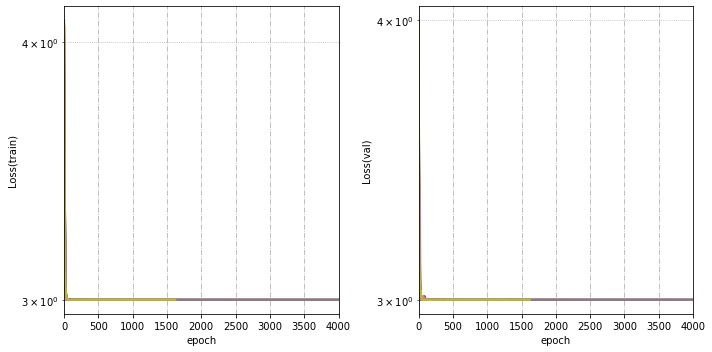

In [9]:
plt.rcParams['figure.figsize'] = (10, 5)
ax1 = plt.subplot(1, 2, 1, yscale='log', ylabel='Loss(train)', xlabel='epoch')
ax2 = plt.subplot(1, 2, 2, yscale='log', ylabel='Loss(val)', xlabel='epoch')



for ax in (ax1, ax2):
    ax.grid(which='major', axis='both', linestyle='-.')
    ax.grid(which='minor', linestyle=':')
    ax.set_xlim([0,4000])

lines, labels = [], []


for i in range(len(d)):
    df = pd.read_csv(d[i])

    label = d[i].split('/')[-2].replace('__', ' ').split('_')[-2:]
    label = d[i]
    l =  ax1.plot(df['loss'], linewidth=2) 
    ax2.plot(df['val_loss'], linewidth=2)
   
    print(i,df['loss'].min(),np.where(df['loss']==df['loss'].min()),df['val_loss'].min(),np.where(df['val_loss']==df['val_loss'].min()),label)



    
    lines.append(l[0])
    labels.append(label)
# ax5 = plt.subplot(3,1,3)
# ax5.legend(lines, labels)
# ax5.legend(lines, labels, bbox_to_anchor=(1.1, -4, 7, 7), fontsize = 10)
# ax5.axis('off')
plt.tight_layout()
# plt.savefig('acc_loss.png',dpi=300)
plt.show()
plt.close()

0 3.000002463780361 (array([3058]),) 3.0000242353485813 (array([271]),) /users/yewzzang/work/JSNS2_vertex/result/20230704_SAVER_weight_loss_seed1234/train.csv
1 3.0000281349838285 (array([3323]),) 3.0000284032444453 (array([1144]),) /users/yewzzang/work/JSNS2_vertex/result/20230704_weight_loss_test_seed7345/train.csv
2 3.0000026016133114 (array([3553]),) 3.000024263353001 (array([224]),) /users/yewzzang/work/JSNS2_vertex/result/20230704_SAVER_weight_loss_seed2345/train.csv
3 3.000030749634695 (array([3992]),) 3.0000286850984508 (array([1231]),) /users/yewzzang/work/JSNS2_vertex/result/20230704_weight_loss_test_seed2345/train.csv
4 3.000026301796459 (array([3750]),) 3.000028249410644 (array([1447]),) /users/yewzzang/work/JSNS2_vertex/result/20230704_weight_loss_test_seed1234/train.csv
5 3.0000390902923364 (array([360]),) 3.000024854589166 (array([284]),) /users/yewzzang/work/JSNS2_vertex/result/20230704_SAVER_weight_loss_seed7345/train.csv
6 3.0000027059177192 (array([3934]),) 3.0000247

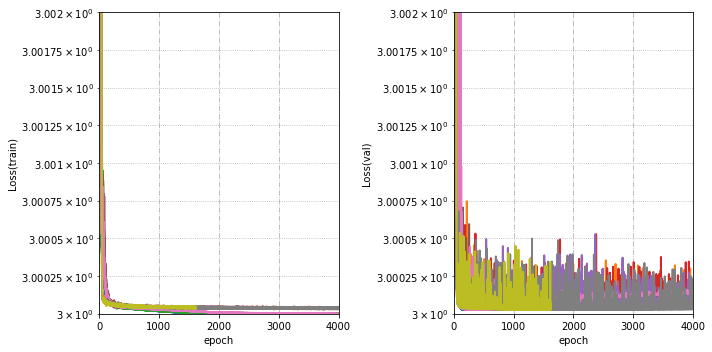

In [10]:
plt.rcParams['figure.figsize'] = (10, 5)
ax1 = plt.subplot(1, 2, 1, yscale='log', ylabel='Loss(train)', xlabel='epoch')
ax2 = plt.subplot(1, 2, 2, yscale='log', ylabel='Loss(val)', xlabel='epoch')



for ax in (ax1, ax2):
    ax.grid(which='major', axis='both', linestyle='-.')
    ax.grid(which='minor', linestyle=':')
    ax.set_xlim([0,4000])
    ax.set_ylim([3,3.002])

lines, labels = [], []


for i in range(len(d)):
    df = pd.read_csv(d[i])

    label = d[i].split('/')[-2].replace('__', ' ').split('_')[-2:]
    label = d[i]
    l =  ax1.plot(df['loss'], linewidth=2) 
    ax2.plot(df['val_loss'], linewidth=2)
   
    print(i,df['loss'].min(),np.where(df['loss']==df['loss'].min()),df['val_loss'].min(),np.where(df['val_loss']==df['val_loss'].min()),label)



    
    lines.append(l[0])
    labels.append(label)
# ax5 = plt.subplot(3,1,3)
# ax5.legend(lines, labels)
# ax5.legend(lines, labels, bbox_to_anchor=(1.1, -4, 7, 7), fontsize = 10)
# ax5.axis('off')
plt.tight_layout()
# plt.savefig('acc_loss.png',dpi=300)
plt.show()
plt.close()

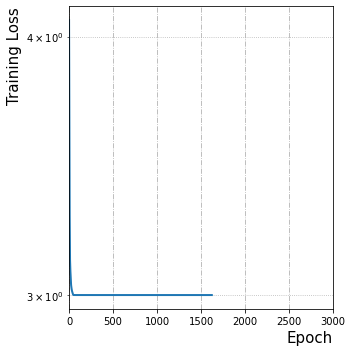

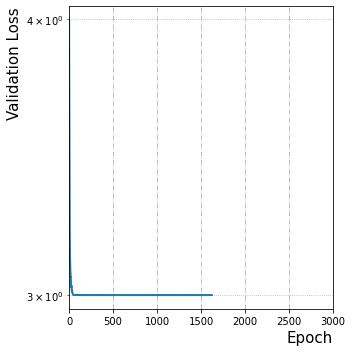

In [11]:
plt.rcParams['figure.figsize'] = (5, 5)



df = pd.read_csv(d[i])

plt.plot(df['loss'], linewidth=2) 
plt.grid(which='major', axis='both', linestyle='-.')
plt.grid(which='minor', linestyle=':')
plt.xlim([0,3000])
plt.yscale('log')
plt.xlabel('Epoch',loc='right',fontsize=15)
plt.ylabel('Training Loss',loc='top',fontsize=15)
plt.tight_layout()
plt.show()


plt.rcParams['figure.figsize'] = (5, 5)



df = pd.read_csv(d[i])

plt.plot(df['val_loss'], linewidth=2)

plt.grid(which='major', axis='both', linestyle='-.')
plt.grid(which='minor', linestyle=':')
plt.xlim([0,3000])
plt.yscale('log')
plt.xlabel('Epoch',loc='right',fontsize=15)
plt.ylabel('Validation Loss',loc='top',fontsize=15)
plt.tight_layout()
plt.show()




    
